In [5]:
import rasterio
from rasterio.plot import show as rioshow
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os

In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


In [3]:
import geopandas as gpd

In [10]:
import numpy as np

In [6]:
# Load TCID, TCAD, and PAR polygons
gdf_tcid = gpd.read_file("PAGASA_TCID.gpkg").to_crs(4326)
gdf_tcad = gpd.read_file("PAGASA_TCAD.gpkg").to_crs(4326)
gdf_par = gpd.read_file("PAGASA_PAR.gpkg").to_crs(4326)
# Load the Philippine waters shapefile
gis_path = "/home/cs-iesm-geostorm/Data/gis/vector/"
phil_waters = gpd.read_file(os.path.join(gis_path,"boundaries/waters/philippine_waters_filled.shp"))
ph_shape = phil_waters.geometry.iloc[0]
phil_coast = gpd.read_file(os.path.join(gis_path,"boundaries/country/Country.shp"))

palawan_shape = gpd.read_file(os.path.join(gis_path,"boundaries/provincial/palawan.gpkg"))


In [11]:
# Load srtm
src_raster = rasterio.open("/home/cs-iesm-geostorm/Data/gis/raster/phl_cgiar_srtm90.tif")
raster_img = src_raster.read(1)  # Read band 1
raster_extent = [
    src_raster.bounds.left, src_raster.bounds.right,
    src_raster.bounds.bottom, src_raster.bounds.top
]


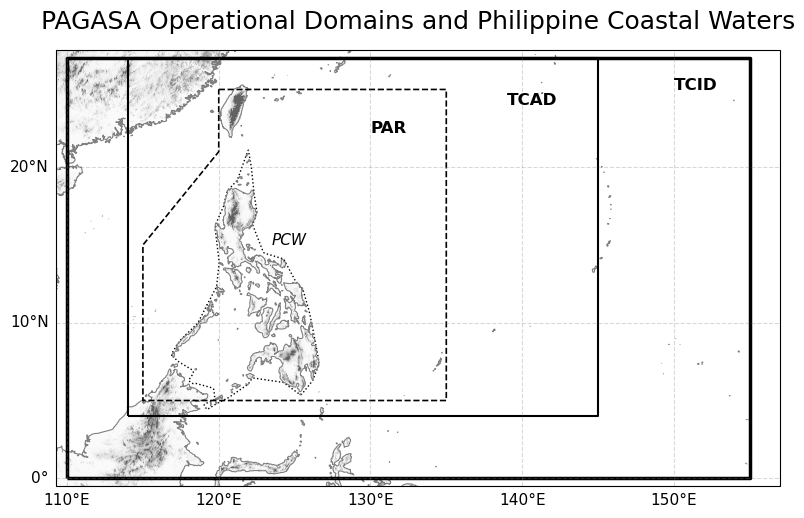

In [17]:
# Create plot
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})

ax.imshow(
    raster_img,
    origin='upper',
    extent=raster_extent,
    transform=ccrs.PlateCarree(),
    cmap='Greys',
    alpha=0.6,
    zorder=0,
    vmin=50,
    vmax=1500
)

# Add ocean and land
ax.add_feature(cfeature.LAND, facecolor='whitesmoke')
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.coastlines(resolution='10m', color='gray', linewidth=0.8)

# Plot boundaries with consistent black outlines
gdf_tcid.boundary.plot(ax=ax, edgecolor='black', linewidth=2.5, linestyle='-')
gdf_tcad.boundary.plot(ax=ax, edgecolor='black', linewidth=1.5, linestyle='-')
gdf_par.boundary.plot(ax=ax, edgecolor='black', linewidth=1.2, linestyle='--')

# Overlay Philippine Coastal Waters (PCW)
phil_waters.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1.0, linestyle=':')
# ax.add_feature(cfeature.ShadedRelief(), alpha=0.5)
# ax.stock_img() 
# Add domain labels
ax.text(150, 25, "TCID", fontsize=12, fontweight='bold', color='black')
ax.text(139, 24, "TCAD", fontsize=12, fontweight='bold', color='black')
ax.text(130, 22.2, "PAR", fontsize=12, fontweight='bold', color='black')
ax.text(123.5, 15, "PCW", fontsize=11, style='italic', color='black')

# Set map extent
ax.set_extent([109.25, 157, -0.5, 25.5])

# Gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.8, color='gray', alpha=0.3, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mticker.FixedLocator(np.arange(100, 175, 10))
gl.ylocator = mticker.FixedLocator(np.arange(0, 45, 10))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 11, 'color': 'black'}
gl.ylabel_style = {'size': 11, 'color': 'black'}

# Title and save
ax.set_title("PAGASA Operational Domains and Philippine Coastal Waters", fontsize=18, pad=15)
plt.tight_layout()
plt.savefig("plot/Figure01_tc_domains_reference_map_elev.png", dpi=300, bbox_inches='tight')
plt.show()